## Time Series
We will learn about time series. 

`pd.Timestamp`
`pandas` represents moments in time using the `pandas.Timestamp` class.

**Example**

In [1]:
import pandas as pd

#create a time stamp
pd.Timestamp(year=2020, month=10, day=18, hour=13, minute=1, second=27)

Timestamp('2020-10-18 13:01:27')

When we store multiple Timestamps in a `pd.Series` the day of type of the column is set to `datetime64[ns]`

In [2]:
# Notice the dtype of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

## Date
- Hourly precipitation data in boilder, Colorado from 2000 to 2014
- September 2013: some of the most intesne precipitation ever recorded
- Goal: visualize precipitation date in 2013 and identify this weather event

About the data: 
- collected by NOAA
- cvs, access it at... https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

In [3]:
import pandas as pd

# read in data 
url = 'https://www.ncei.noaa.gov/orders/cdo/3488381.csv'
precip=pd.read_csv(url)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

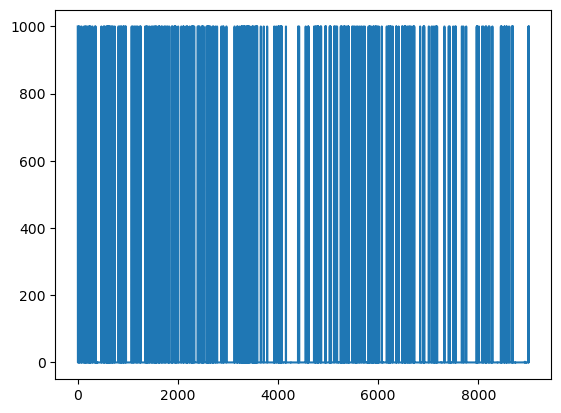

In [4]:
# first attempt at plotting precipitation
precip.HPCP.plot()

Issue with this graph:
1. all the 99999 values are interpreted as data instead of missing values for HPCP. 
2. x-axis values = index of the datafarme and not relative to time 
3. we only want precipitation data from 2013, this is showing all our data.

## Missing data
Metadata: missing values in HPCP colum are indicated by the number 999.99
Solution: reload the dataframe indicating that 999.99 is the missing values

How: add the `na_valeus`parameter to `pd.read_csv()` funcion to indicate additional values that should be recognized as `NA`.

In [5]:
# read in csv indicating NA values
precip=pd.read_csv(url, na_values=[999.99])

#check update df
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

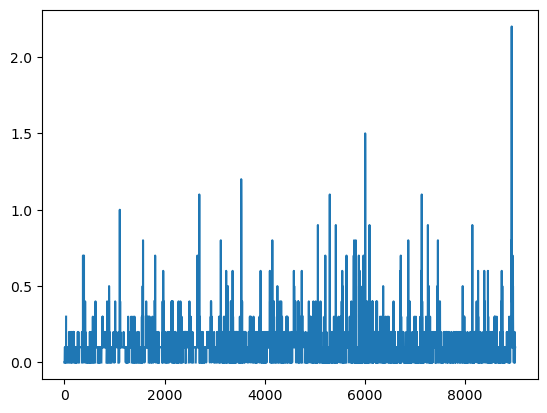

In [6]:
# another tyr at plotting
precip.HPCP.plot()

## Strings into dates
Notice DATE column in our dateframe is not of type `datetime64`.
Check this using `dtype` attribute for data frame. 

In [7]:
# check data types of all column
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

`object` dtype means (most likely) all values in a that column are strings.

Convert strings to datatime objects using the `to_datetime()` pandas function
- `pd.to_datetime()` input:pd.Series with strings that can be convert to dates.
- `pd.to_datetime()` output: pd.Series with the strings converted to date-time. 

In [8]:
precip.DATE 

0       20000101 00:00
1       20000101 01:00
2       20000102 20:00
3       20000103 01:00
4       20000103 05:00
             ...      
9001    20131222 01:00
9002    20131223 00:00
9003    20131223 02:00
9004    20131229 01:00
9005    20131231 00:00
Name: DATE, Length: 9006, dtype: object

Overwrite the DATE column with this output

In [9]:
# convert DATE column from string to timestamps
precip.DATE = pd.to_datetime(precip.DATE)

# check column data type is updated
print(precip.dtypes)

# check new values
precip.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 00:00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 01:00:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-02 20:00:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 01:00:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 05:00:00,0.0,,q


In [10]:
# each value to the DATE column is a pandas.Timestamp
type(precip.DATE.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='DATE'>

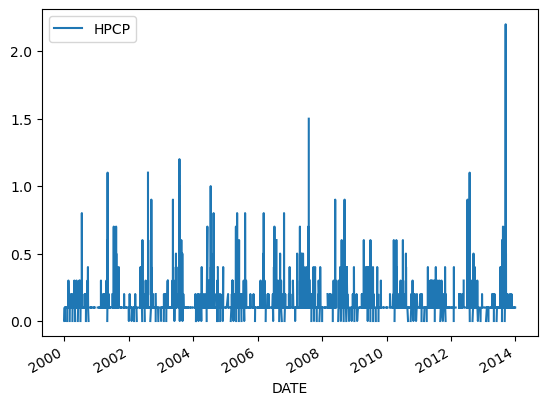

In [11]:
# another try at plotting
precip.plot(x='DATE', y='HPCP')

# Timestamp index
Let's set the DATE column as index.
Updating the index in a dtaframe is simple, us the `set_index()` method. Syntax:
```
df = df.set_index(new_index)
```

where `new_index`: 
- the name of the column (string) we wamt tp set as an index, 
- if our index is not a column, an array or `pd.Series` of the same length as dataframe.

Example

In [12]:
# set DATE as index
precip = precip.set_index('DATE')

#check the new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

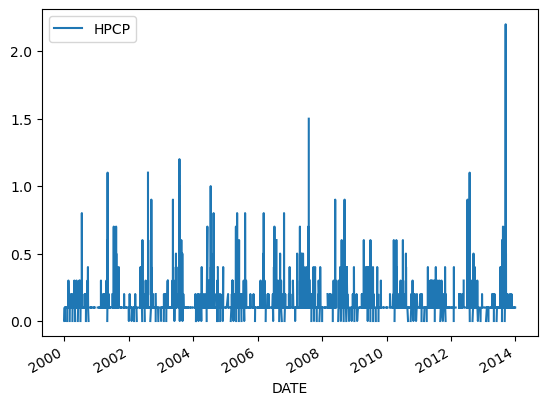

In [13]:
# simplify our plotting
precip.plot()

## Subsetting
Once our index if type timedate `pandas` can subset data in nice ways.

In [14]:
# select data from a given month and year. 
# use loc['year-month']

precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [17]:
# select data from a give year
# use loc['year']
precip.loc['2012']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2012-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,},
2012-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2012-01-03 12:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,{,
2012-01-04 13:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,},
2012-01-07 15:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2012-12-11 01:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2012-12-19 06:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2012-12-24 19:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

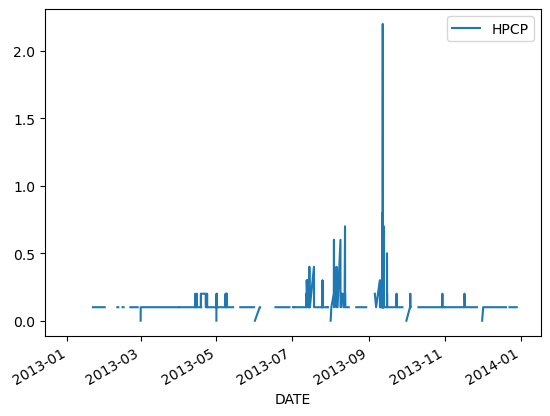

In [18]:
# use selection by time to plot 2013 date
precip.loc['2013'].plot()

## Resample

Resmapling a time series means converta time series from one frequence to another. For example, 
- monthly to yearly (downsampling)
- weekly to daily(upsampling),

We can resample with the `resample()` method. Simplest call:
```
df.resample(new_frequency).aggregator_function()
```

Note: `resample()` is widely *Very similar* to `groupby()` it is a method the in a certain way and then we need to specify a way to affregate it to get an output. 

Example: 
our 2014 date has hourly frequency and we want to resample of daily frequency.

In [24]:
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, ylabel='daily precipitation (in)'>

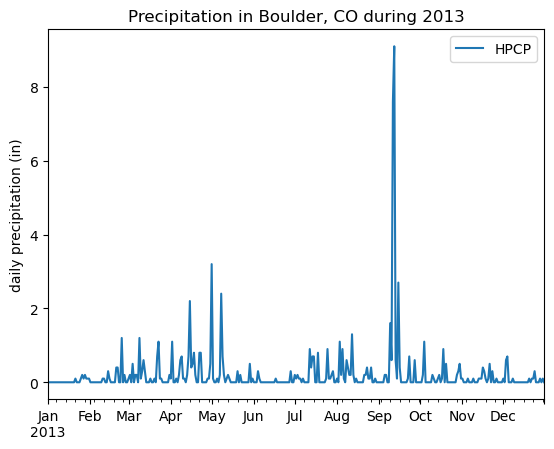

In [26]:
daily_precip_2013.plot(ylabel = 'daily precipitation (in)', 
                      xlabel = '',
                      title = 'Precipitation in Boulder, CO during 2013',
                      label = False)